<a href="https://colab.research.google.com/github/Deepakkumar5570/lab1-project/blob/main/Coordinate_focus_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/surya2003-real/Plant-disease-detection.git

Cloning into 'Plant-disease-detection'...
remote: Enumerating objects: 82, done.
remote: Total 82 (delta 0), reused 0 (delta 0), pack-reused 82 (from 1)
Receiving objects: 100% (82/82), 267.80 MiB | 26.40 MiB/s, done.
Resolving deltas: 100% (33/33), done.
Updating files: 100% (36/36), done.


In [2]:
!git clone https://github.com/pratikkayal/PlantDoc-Object-Detection-Dataset.git

Cloning into 'PlantDoc-Object-Detection-Dataset'...
remote: Enumerating objects: 5196, done.
remote: Counting objects: 100% (1956/1956), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 5196 (delta 1926), reused 1815 (delta 1815), pack-reused 3240 (from 1)
Receiving objects: 100% (5196/5196), 941.87 MiB | 30.32 MiB/s, done.
Resolving deltas: 100% (2441/2441), done.
Updating files: 100% (5200/5200), done.


In [3]:
!pip install ultralytics opencv-python matplotlib -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.3 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
# Load trained YOLOv8 model
model_path = "/content/Plant-disease-detection/YOLOv8_training/best.pt"
model = YOLO(model_path)


WARNING ⚠️ /content/Plant-disease-detection/YOLOv8_training/best.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolo11n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.1s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



#Main Model

In [23]:
from ultralytics import YOLO
import cv2
import os
import pandas as pd
from pathlib import Path

# Load the trained YOLOv8 model
model_path = "/content/Plant-disease-detection/YOLOv8_training/best.pt"
model = YOLO(model_path)

# Define the path to your images dataset
dataset_path = '/content/PlantDoc-Object-Detection-Dataset/TEST'  # Adjust to your dataset path

# Define class names (map the class IDs to class names as per your model training)
class_names = ["class_1", "class_2"]  # Replace with actual class names

# Create a list to store the bounding box coordinates and related information for each image
bbox_data = []

# Valid image extensions (you can add more if necessary)
valid_image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

# Function to extract bounding boxes and save to a CSV file
def extract_and_save_bounding_boxes(csv_output_path):
    global bbox_data
    # Iterate through all files in the dataset folder
    for image_file in Path(dataset_path).rglob('*.*'):  # Accepting any file extension
        image_path = str(image_file)

        # Check if the file has a valid image extension
        if not any(image_path.lower().endswith(ext) for ext in valid_image_extensions):
            continue  # Skip non-image files (like XML files)

        # Load image using OpenCV
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is None:
            print(f"Warning: Unable to load image {image_path}")
            continue  # Skip this image and go to the next one

        # Perform inference (object detection) with YOLOv8
        results = model(image)

        # Iterate through results and extract bounding boxes
        for result in results:
            boxes = result.boxes.xywh.cpu().numpy()  # x_center, y_center, width, height
            class_ids = result.boxes.cls.cpu().numpy()  # Class IDs
            scores = result.boxes.conf.cpu().numpy()  # Confidence scores

            # Convert to top-left and bottom-right coordinates (x1, y1, x2, y2)
            for box, class_id, score in zip(boxes, class_ids, scores):
                x_center, y_center, width, height = box
                x1 = int(x_center - width / 2)  # x1 = center_x - width/2
                y1 = int(y_center - height / 2) # y1 = center_y - height/2
                x2 = int(x_center + width / 2)  # x2 = center_x + width/2
                y2 = int(y_center + height / 2) # y2 = center_y + height/2

                # Get the class label from the class ID
                class_label = class_names[int(class_id)]  # Map class ID to class name

                # Store bounding box coordinates, class label, and confidence score in the bbox_data list
                bbox_data.append({
                    'image': image_path,
                    'x1': x1,  # x1 (top-left)
                    'y1': y1,  # y1 (top-left)
                    'x2': x2,  # x2 (bottom-right)
                    'y2': y2,  # y2 (bottom-right)
                    'class_label': class_label,  # Add class label
                    'confidence': score  # Add confidence (focus score)
                })

                # Print the required information
                print(f"Image: {image_path} | x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}, Label: {class_label}, Confidence: {score:.4f}")

    # Save the bounding box data to a CSV file
    df = pd.DataFrame(bbox_data)
    df.to_csv(csv_output_path, index=False)
    print(f"Bounding box data saved to {csv_output_path}")

# Define the output CSV path
csv_output_path = '/content/OUTPUT/OUTPUT_COORDINATE11.csv'

# Call the function to extract bounding boxes and save them to the CSV
extract_and_save_bounding_boxes(csv_output_path)


In [25]:
from ultralytics import YOLO
import cv2
import os
import pandas as pd
from pathlib import Path

# Load the trained YOLOv8 model
model_path = "/content/Plant-disease-detection/YOLOv8_training/best.pt"
model = YOLO(model_path)

# Define the path to your images dataset
dataset_path = '/content/PlantDoc-Object-Detection-Dataset/TEST'  # Adjust to your dataset path

# Define class names (map the class IDs to class names as per your model training)
class_names = ["class_1", "class_2"]  # Replace with actual class names

# Create a list to store the bounding box coordinates and related information for each image
bbox_data = []

# Valid image extensions (you can add more if necessary)
valid_image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

# Function to extract bounding boxes and save to a CSV file
def extract_and_save_bounding_boxes(csv_output_path):
    global bbox_data
    image_counter = 0  # Counter to process only 5 images
    # Iterate through all files in the dataset folder
    for image_file in Path(dataset_path).rglob('*.*'):  # Accepting any file extension
        image_path = str(image_file)

        # Check if the file has a valid image extension
        if not any(image_path.lower().endswith(ext) for ext in valid_image_extensions):
            continue  # Skip non-image files (like XML files)

        # Load image using OpenCV
        image = cv2.imread(image_path)

        # Check if the image was loaded correctly
        if image is None:
            print(f"Warning: Unable to load image {image_path}")
            continue  # Skip this image and go to the next one

        # Perform inference (object detection) with YOLOv8
        results = model(image)

        # Iterate through results and extract bounding boxes
        for result in results:
            boxes = result.boxes.xywh.cpu().numpy()  # x_center, y_center, width, height
            class_ids = result.boxes.cls.cpu().numpy()  # Class IDs
            scores = result.boxes.conf.cpu().numpy()  # Confidence scores

            # Convert to top-left and bottom-right coordinates (x1, y1, x2, y2)
            for box, class_id, score in zip(boxes, class_ids, scores):
                x_center, y_center, width, height = box
                x1 = int(x_center - width / 2)  # x1 = center_x - width/2
                y1 = int(y_center - height / 2) # y1 = center_y - height/2
                x2 = int(x_center + width / 2)  # x2 = center_x + width/2
                y2 = int(y_center + height / 2) # y2 = center_y + height/2

                # Get the class label from the class ID
                class_label = class_names[int(class_id)]  # Map class ID to class name

                # Store bounding box coordinates, class label, and confidence score in the bbox_data list
                bbox_data.append({
                    'image': image_path,
                    'x1': x1,  # x1 (top-left)
                    'y1': y1,  # y1 (top-left)
                    'x2': x2,  # x2 (bottom-right)
                    'y2': y2,  # y2 (bottom-right)
                    'class_label': class_label,  # Add class label
                    'confidence': score  # Add confidence (focus score)
                })

                # Print the required information
                print(f"Image: {image_path} | x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}, Label: {class_label}, Confidence: {score:.4f}")

        image_counter += 1
        if image_counter >= 5:  # Stop after processing 5 images
            break

    # Save the bounding box data to a CSV file
    df = pd.DataFrame(bbox_data)
    df.to_csv(csv_output_path, index=False)
    print(f"Bounding box data saved to {csv_output_path}")

# Define the output CSV path
csv_output_path = '/content/OUTPUT/OUTPUT_COORDINATE11.csv'

# Call the function to extract bounding boxes and save them to the CSV
extract_and_save_bounding_boxes(csv_output_path)



0: 640x448 1 leaf, 2373.7ms
Speed: 15.8ms preprocess, 2373.7ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 448)
Image: /content/PlantDoc-Object-Detection-Dataset/TEST/Corn-SCLB-2017-1.jpg | x1: 882, y1: 4, x2: 2802, y2: 5167, Label: class_1, Confidence: 0.8427

0: 640x480 1 leaf, 2147.0ms
Speed: 6.0ms preprocess, 2147.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Image: /content/PlantDoc-Object-Detection-Dataset/TEST/20130610_110514.jpg | x1: 194, y1: 434, x2: 2184, y2: 2927, Label: class_1, Confidence: 0.8749

0: 512x640 12 leafs, 1965.1ms
Speed: 7.0ms preprocess, 1965.1ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
Image: /content/PlantDoc-Object-Detection-Dataset/TEST/Tomato59.JPG.jpg | x1: 165, y1: 287, x2: 571, y2: 515, Label: class_1, Confidence: 0.8390
Image: /content/PlantDoc-Object-Detection-Dataset/TEST/Tomato59.JPG.jpg | x1: 924, y1: 194, x2: 1142, y2: 509, Label: class_1, Confidence: 0.8383
Image: /content/PlantDo

In [26]:
import pandas as pd

# Define the path to your saved CSV file
csv_output_path = '/content/OUTPUT/OUTPUT_COORDINATE11.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_output_path)

# Display the DataFrame as a table
df.head()  # You can change the number in head() to see more or fewer rows


,image,x1,y1,x2,y2,class_label,confidence
0,/content/PlantDoc-Object-Detection-Dataset/TES...,882,4,2802,5167,class_1,0.842741
1,/content/PlantDoc-Object-Detection-Dataset/TES...,194,434,2184,2927,class_1,0.874935
2,/content/PlantDoc-Object-Detection-Dataset/TES...,165,287,571,515,class_1,0.839013
3,/content/PlantDoc-Object-Detection-Dataset/TES...,924,194,1142,509,class_1,0.838311
4,/content/PlantDoc-Object-Detection-Dataset/TES...,381,193,561,328,class_1,0.836589


In [39]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
output_folder = '/content/PlantDoc-Object-Detection-Dataset/OUTPUT'
csv_path = os.path.join(output_folder, "OUTPUT_COORDINATE.csv")

# Check if CSV exists
if not os.path.exists(csv_path):
    print("❌ CSV file does not exist.")
else:
    bbox_data = pd.read_csv(csv_path)

    def display_detected_objects(num_images=5):
        # Set up the figure with subplots to show all images in a row
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
        axes = axes.flatten()  # Flatten the axes to make indexing easier

        for idx, row in bbox_data.iterrows():
            if idx >= num_images:
                break  # Display only the specified number of images

            image_path = row['image']
            if not os.path.exists(image_path):
                print(f"⚠ Image not found: {image_path}")
                continue

            image = cv2.imread(image_path)
            if image is None:
                print(f"⚠ Unable to load image: {image_path}")
                continue

            x1, y1, x2, y2 = map(int, [row['x1'], row['y1'], row['x2'], row['y2']])
            class_label, confidence = row['class_label'], row['confidence']

            # Draw bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box
            label = f"{class_label} {confidence:.2f}"
            cv2.putText(image, label, (x1, max(y1 - 10, 20)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

            # Convert to RGB for displaying with matplotlib
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Plot the image on the corresponding subplot
            ax = axes[idx]
            ax.imshow(image_rgb)
            ax.set_title(f"Class: {class_label}\nConfidence: {confidence:.2f}")
            ax.set_xlabel("Width (pixels)")
            ax.set_ylabel("Height (pixels)")
            ax.axis('off')  # Hide axes for better visualization

        plt.tight_layout()  # Adjust the layout to prevent overlapping
        plt.show()

    # Call the function to display 5 images with bounding boxes
    display_detected_objects(num_images=5)


❌ CSV file does not exist.


In [35]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
output_folder = '/content/PlantDoc-Object-Detection-Dataset/OUTPUT'
csv_path = os.path.join(output_folder, "OUTPUT_COORDINATE.csv")

# Check if CSV exists
if not os.path.exists(csv_path):
    print("❌ CSV file does not exist.")
else:
    bbox_data = pd.read_csv(csv_path)

    def display_images_with_bboxes(num_images=5):
        for idx, row in bbox_data.iterrows():
            if idx >= num_images:
                break  # Display only the specified number of images

            image_path = row['image']
            if not os.path.exists(image_path):
                print(f"⚠ Image not found: {image_path}")
                continue

            image = cv2.imread(image_path)
            if image is None:
                print(f"⚠ Unable to load image: {image_path}")
                continue

            x1, y1, x2, y2 = map(int, [row['x1'], row['y1'], row['x2'], row['y2']])
            class_label, confidence = row['class_label'], row['confidence']

            # Draw bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"{class_label} {confidence:.2f}"
            cv2.putText(image, label, (x1, max(y1 - 10, 20)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

            # Convert to RGB and plot with coordinate axis
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(6, 6))
            plt.imshow(image_rgb)
            plt.xlabel("Width (pixels)")
            plt.ylabel("Height (pixels)")
            plt.title(f"Bounding Box: {class_label} ({confidence:.2f})")


    display_images_with_bboxes(num_images=5)

❌ CSV file does not exist.


                                               image    x1   y1    x2    y2  \
0  /content/PlantDoc-Object-Detection-Dataset/TES...   882    4  2802  5167   
1  /content/PlantDoc-Object-Detection-Dataset/TES...   194  434  2184  2927   
2  /content/PlantDoc-Object-Detection-Dataset/TES...   165  287   571   515   
3  /content/PlantDoc-Object-Detection-Dataset/TES...   924  194  1142   509   
4  /content/PlantDoc-Object-Detection-Dataset/TES...   381  193   561   328   
5  /content/PlantDoc-Object-Detection-Dataset/TES...   633  936   916  1193   
6  /content/PlantDoc-Object-Detection-Dataset/TES...   526  165   635   326   
7  /content/PlantDoc-Object-Detection-Dataset/TES...   988  892  1210  1196   
8  /content/PlantDoc-Object-Detection-Dataset/TES...   229  688   492   781   
9  /content/PlantDoc-Object-Detection-Dataset/TES...  1156  161  1393   455   

  class_label  confidence  
0     class_1    0.842741  
1     class_1    0.874935  
2     class_1    0.839013  
3     class_1    0

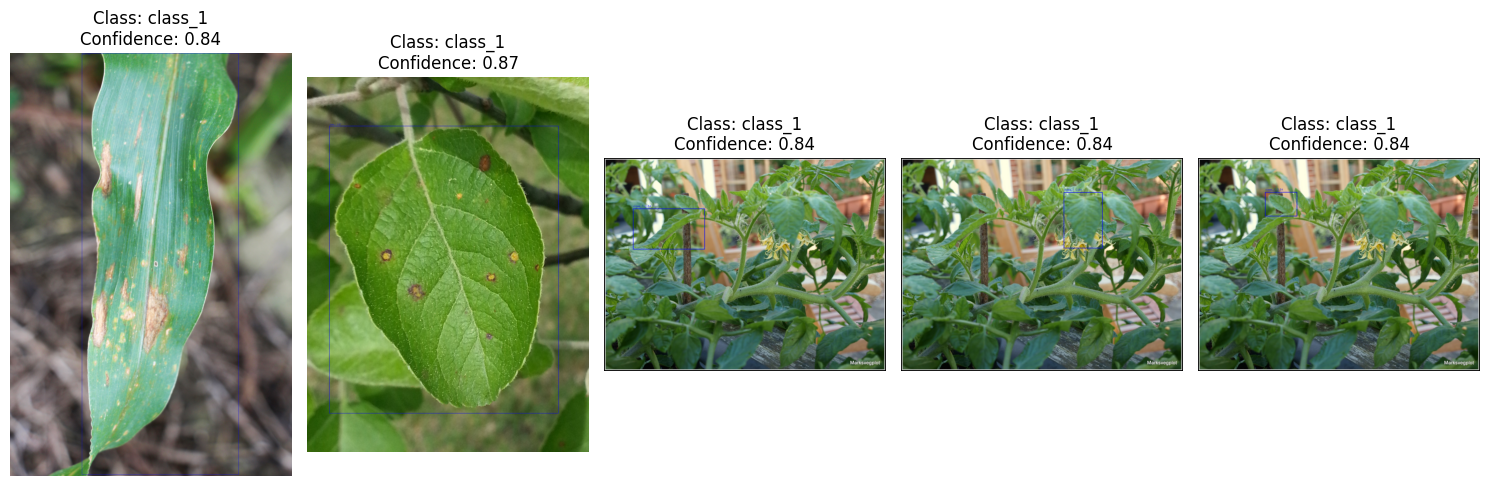

In [44]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_path = '/content/OUTPUT/OUTPUT_COORDINATE11.csv'

# Load the CSV into a DataFrame
bbox_data = pd.read_csv(csv_path)

# Display the first few rows of the CSV (for debugging purposes)
print(bbox_data.head(10))  # Show the first 10 rows for inspection

def display_images_with_bboxes(num_images=5, rectangle_color=(0, 0, 255)):
    """
    Function to display images with bounding boxes.
    It will visualize the first 'num_images' images from the CSV file, with bounding boxes drawn
    based on the coordinates in the CSV.
    You can change the rectangle color by passing a custom color in BGR format.
    """
    # Create a subplot to display multiple images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    axes = axes.flatten()  # Flatten to make it easy to iterate

    # Iterate through the first 'num_images' rows of the DataFrame
    for idx, row in bbox_data.iloc[:num_images].iterrows():  # Select first 'num_images' images explicitly
        image_path = row['image']

        # Check if the image exists at the given path
        if not os.path.exists(image_path):
            print(f"⚠ Image not found: {image_path}")
            continue

        # Load the image using OpenCV
        image = cv2.imread(image_path)
        if image is None:
            print(f"⚠ Unable to load image: {image_path}")
            continue

        # Extract bounding box coordinates and other information from the CSV
        x1, y1, x2, y2 = map(int, [row['x1'], row['y1'], row['x2'], row['y2']])
        class_label, confidence = row['class_label'], row['confidence']

        # Draw the bounding box with the custom color
        cv2.rectangle(image, (x1, y1), (x2, y2), rectangle_color, 2)  # Custom color for the bounding box
        label = f"{class_label} {confidence:.2f}"
        cv2.putText(image, label, (x1, max(y1 - 10, 20)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, rectangle_color, 1)

        # Convert BGR to RGB for displaying with matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image with bounding box on the corresponding axis
        ax = axes[idx]
        ax.imshow(image_rgb)
        ax.set_title(f"Class: {class_label}\nConfidence: {confidence:.2f}")
        ax.set_xlabel("Width (pixels)")
        ax.set_ylabel("Height (pixels)")
        ax.axis('off')  # Hide axis for better visualization

    # Adjust layout and display the images
    plt.tight_layout()
    plt.show()

# Call the function to display the first 5 images with bounding boxes and custom color
# You can change the rectangle_color to any other color (e.g., (255, 0, 0) for blue, (255, 255, 0) for yellow)
display_images_with_bboxes(num_images=5, rectangle_color=(255, 0, 0))  # Red color for rectangles
